## Feature Scaling - Normalization

In [1]:
# Normalization is a technique often applied as part of data preparation for ML. The goal of normalization is to change the values of numeric columns is the dataset to use a common scale, without distorting difference in the range of values or losing information.


""" 
Famous normalization techniques

    Min-Max scaling
    Mean normalization
    Max absolute scaling
    Robust scaling
    etc.


"""


' \nFamous normalization techniques\n\n    Min-Max scaling\n    Mean normalization\n    Max absolute scaling\n    Robust scaling\n    etc.\n\n\n'

### Min-Max normalization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
a = pd.read_csv('wine.csv')
a

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# using only the necessary data

df = a[['class_label', 'alcohol', 'malic_acid']]
df

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [5]:
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled       # now the datas are scaled

,class_label,alcohol,malic_acid
0,-1.213944,1.518613,-0.562250
1,-1.213944,0.246290,-0.499413
2,-1.213944,0.196879,0.021231
3,-1.213944,1.691550,-0.346811
4,-1.213944,0.295700,0.227694
...,...,...,...
173,1.373864,0.876275,2.974543
174,1.373864,0.493343,1.412609
175,1.373864,0.332758,1.744744
176,1.373864,0.209232,0.227694


<Axes: xlabel='alcohol', ylabel='malic_acid'>

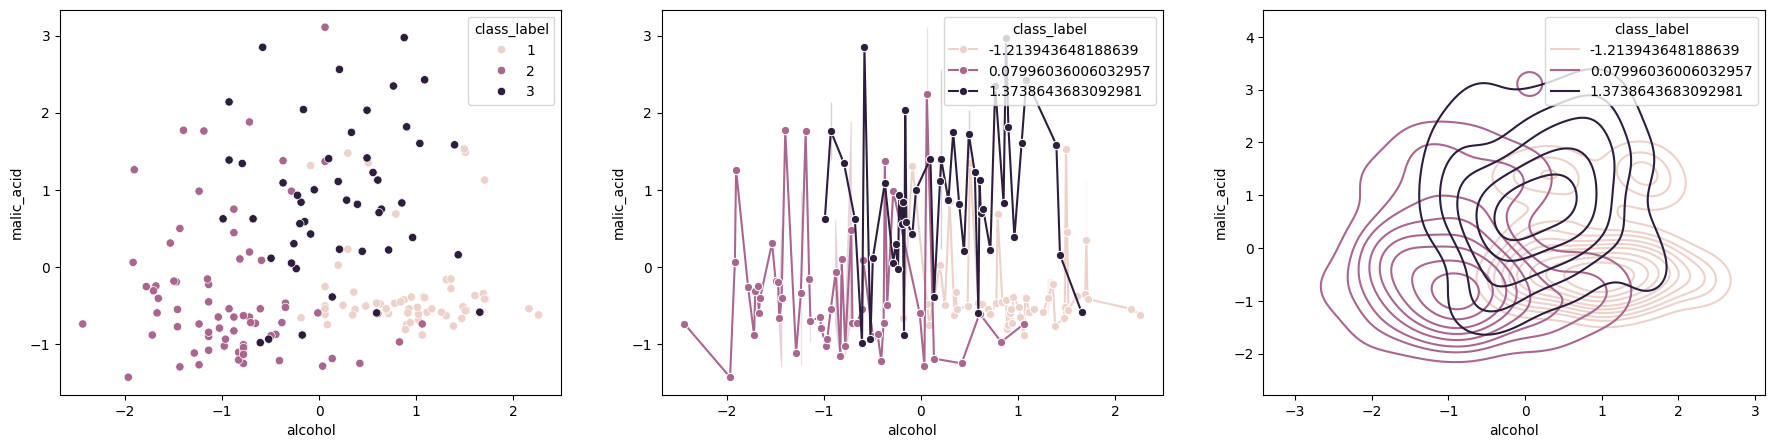

In [6]:
# plotting all scaled data at a time
fig, axes = plt.subplots(1, 3, figsize= (22, 5))


sns.scatterplot(df_scaled, x='alcohol', y='malic_acid' , hue=a['class_label'], ax=axes[0])
sns.lineplot(df_scaled, x='alcohol', y='malic_acid', hue='class_label', marker='o', ax=axes[1])
sns.kdeplot(df_scaled, x='alcohol', y='malic_acid', hue='class_label', ax=axes[2])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

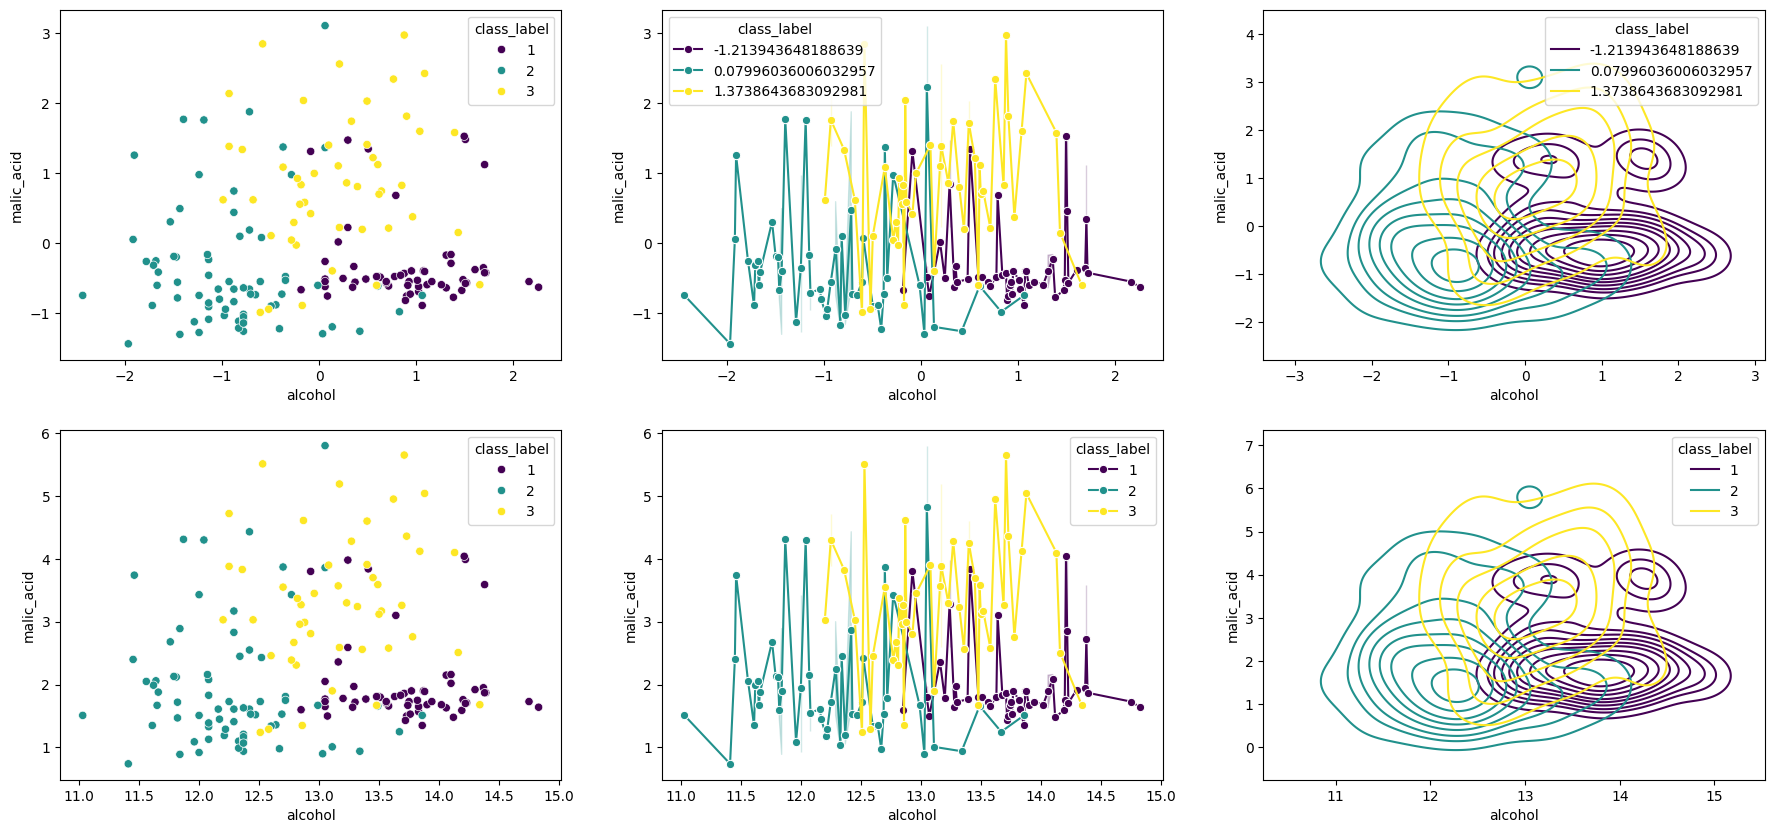

In [7]:
# plotting all the labeled data and the unlabeled data together
fig, axes = plt.subplots(2, 3, figsize=(22, 10))

# scaled dataset
sns.scatterplot(df_scaled, x='alcohol', y='malic_acid' , hue=a['class_label'], ax=axes[0, 0], palette='viridis')
sns.lineplot(df_scaled, x='alcohol', y='malic_acid', hue='class_label', marker='o', ax=axes[0, 1], palette='viridis')
sns.kdeplot(df_scaled, x='alcohol', y='malic_acid', hue='class_label', ax=axes[0, 2], palette='viridis')

# unscaled dataset
sns.scatterplot(a, x='alcohol', y='malic_acid', hue='class_label', ax=axes[1, 0], palette='viridis')
sns.lineplot(a, x='alcohol', y='malic_acid', hue='class_label', marker='o', ax=axes[1, 1], palette='viridis')
sns.kdeplot(a, x='alcohol', y='malic_acid', hue='class_label', ax=axes[1, 2], palette='viridis')


In [8]:
# training the model on Min-Max
# here we are taking class label as output column
x_train, x_test, y_train, y_test = train_test_split(df.drop('class_label', axis=1), df['class_label'], test_size=0.3, random_state=0)

# printing the shape of data
print(f"{x_train.shape}, {x_test.shape} \n")

# scaling the data using Min-Max scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# converting the array data into a DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# making predictions
log = LogisticRegression()
log.fit(x_train_scaled, y_train)
y_test_pred = log.predict(x_test_scaled)


# printing accuracy
print(f"accuracy score is : {np.round(accuracy_score(y_test, y_test_pred), 2) * 100} %")



(124, 2), (54, 2) 

accuracy score is : 80.0 %


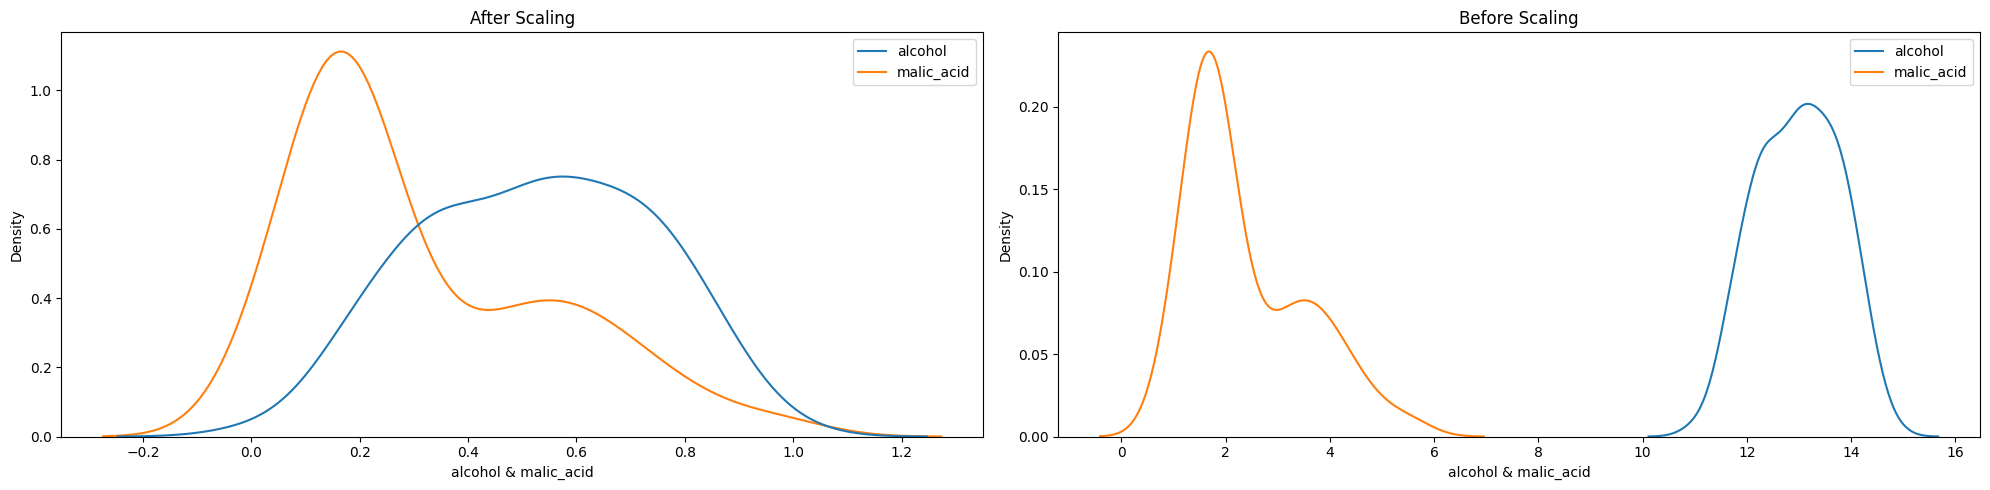

In [9]:
# making comparison using graphs
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# after scaling
sns.kdeplot(x_train_scaled, ax=axes[0])
axes[0].set_title('After Scaling')
axes[0].set_xlabel('alcohol & malic_acid')

# before scaling
sns.kdeplot(x_train, ax=axes[1])
axes[1].set_title('Before Scaling')
axes[1].set_xlabel('alcohol & malic_acid')

plt.tight_layout()
plt.show()